# Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import linear_model

# Custom Functions

In [4]:
def pred_plot(predictors, predictor_label, response, response_label, predictions):
    
    with plt.style.context(('fivethirtyeight')):

        fig, ax = plt.subplots(figsize=(10, 7))

        ax.scatter(predictors, response, c='b', label='actual')
        ax.scatter(predictors, predictions, c='r', label='predicted')
#         z = np.polyfit(predictors, predictions, 1)
#         p = np.poly1d(z)
#         ax.plot(predictors, p(predictors), "r-", linewidth=1)
        ax.set_title('Feature vs Response')
        ax.set_xlabel(predictor_label)
        ax.set_ylabel(response_label)
        ax.legend(loc='upper left')

In [5]:
def res_plot(response, predictions):
    
    residuals = response - predictions
    
    with plt.style.context(('fivethirtyeight')):

        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 20))
        
        ax1.scatter(predictions, response)
#         z = np.polyfit(predictions, response, 1)
#         p = np.poly1d(z)
#         ax1.plot(predictions, p(predictions), "r-", linewidth=1)
        ax1.set_title('Predicted vs Actual Values')
        ax1.set_xlabel('Predicted')
        ax1.set_ylabel('Actual')

        ax2.scatter(predictions, residuals)
#         z = np.polyfit(predictions, residuals, 1)
#         p = np.poly1d(z)
#         ax2.plot(predictions, p(predictions), "r-", linewidth=1)
        ax2.set_title('Predicted Values vs Residuals')
        ax2.set_xlabel('Predicted')
        ax2.set_ylabel('Residuals')

In [6]:
class RegularizeLRModel():
    '''
    Methods:
        val_score
        val_curve
        test_model
    '''
    
    def __init__(self, X_train, y_train, alphas, method="Ridge"):
        
        self.X_train = X_train
        self.y_train = y_train
        self.alphas = alphas
        self.method = method
        
        # initialize empty lists for train and val scores and coefs
        self.train_error = []
        self.val_error = []
        self.coefs = []
    
    
    def val_score(self, n_steps=100, cv=10):
        '''
        Cross validation of linear regression model with Ridge regularization
        Calculates mean squared error for different alphas
        Returns coefficients for each alpha value (.coefs)
        Returns best alpha value for model (.best_alpha)
        '''
        
        for alpha in self.alphas:
            
            if self.method == "Ridge":
                # initialize linear regression model with Ridge regularization
                self.reg_model = linear_model.Ridge(alpha=alpha, solver='svd')
            elif self.method == "Lasso":
                self.reg_model = linear_model.Lasso(alpha=alpha)
            elif self.method == "Elastic":
                self.reg_model = linear_model.ElasticNet(alpha=alpha)
                
            # run cross validation on model
            cv_mod = model_selection.cross_validate(self.reg_model, self.X_train, self.y_train, 
                                               cv=cv, scoring='r2', return_train_score=True)
            # initialize minimum error
            if alpha == self.alphas[0]:
                max_r2 = np.mean(cv_mod['test_score'])
                self.best_alpha = alpha
                
            # append train and validation mean squared errors
            self.train_error.append(np.mean(cv_mod['train_score']))
            self.val_error.append(np.mean(cv_mod['test_score']))
        
            # fit model on training data
            self.reg_model.fit(self.X_train, self.y_train)
            # append coefficients
            self.coefs.append(self.reg_model.coef_)
            
            # check if min error
            if np.mean(cv_mod['test_score']) > max_r2:
                min_err = np.mean(cv_mod['test_score'])
                self.best_alpha = alpha
                
        self.coefs = np.array(self.coefs)[:, 0, :]
    
    
    def val_curve(self):
        
        with plt.style.context(('fivethirtyeight')):

            fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,20))

            axes[0].plot(self.alphas, self.train_error, label="Train", c='b')
            axes[0].plot(self.alphas, self.val_error, label="Validation", c='r')
            axes[0].axvline(x=self.best_alpha, linewidth=2, linestyle='dashed')
            axes[0].set_ylabel("R Squared")
            axes[0].set_xlabel("Alpha Value")
            axes[0].legend(loc='upper right')

            axes[1].plot(self.alphas, self.coefs)
            axes[1].axvline(x=self.best_alpha, linewidth=2, linestyle='dashed')
            axes[1].set_ylabel("Coefficient Value")
            axes[1].set_xlabel("Alpha Value")

# Data

In [7]:
X_num = pd.read_csv('data/data_numeric.csv', index_col=0)
X_cat = pd.read_csv('data/data_categorical.csv', index_col=0)
Y = pd.read_csv('data/data_targets.csv', index_col=0)

In [8]:
X_num.head()

,AGE,YEARS_SINCE_RECON,ADT_029,ADTT,TRAFFIC_LANES_ON_028A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,VERT_CLR_UND_054B
ID,,,,,,,,,,
10-1038 209,4.0,4.0,13090.0,39270.0,2.0,1.0,8.2,9.1,14.2,0.00
10-1054A017,6.0,6.0,14112.0,141120.0,5.0,1.0,12.2,12.8,33.3,0.00
10-1172A275,11.0,11.0,1572.0,11004.0,2.0,3.0,6.1,19.8,12.4,4.77
10-1177 274,98.0,33.0,6580.0,46060.0,2.0,1.0,6.1,7.9,8.1,0.00
10-1211A011,50.0,40.0,37376.0,112128.0,4.0,1.0,15.8,17.1,27.3,0.00


In [9]:
X_cat.head()

,MAINTENANCE_021_1.0,MAINTENANCE_021_2.0,MAINTENANCE_021_3.0,MAINTENANCE_021_4.0,MAINTENANCE_021_11.0,MAINTENANCE_021_12.0,MAINTENANCE_021_21.0,MAINTENANCE_021_25.0,MAINTENANCE_021_26.0,MAINTENANCE_021_27.0,...,DECK_PROTECTION_108C_0,DECK_PROTECTION_108C_1,DECK_PROTECTION_108C_2,DECK_PROTECTION_108C_3,DECK_PROTECTION_108C_4,DECK_PROTECTION_108C_6,DECK_PROTECTION_108C_7,DECK_PROTECTION_108C_8,DECK_PROTECTION_108C_9,DECK_PROTECTION_108C_N
ID,,,,,,,,,,,,,,,,,,,,,
10-1038 209,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10-1054A017,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10-1172A275,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10-1177 274,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10-1211A011,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [10]:
Y.head()

,TO_DWNGRD
ID,
10-1038 209,10
10-1054A017,17
10-1172A275,5
10-1177 274,15
10-1211A011,19


# Preprocessing

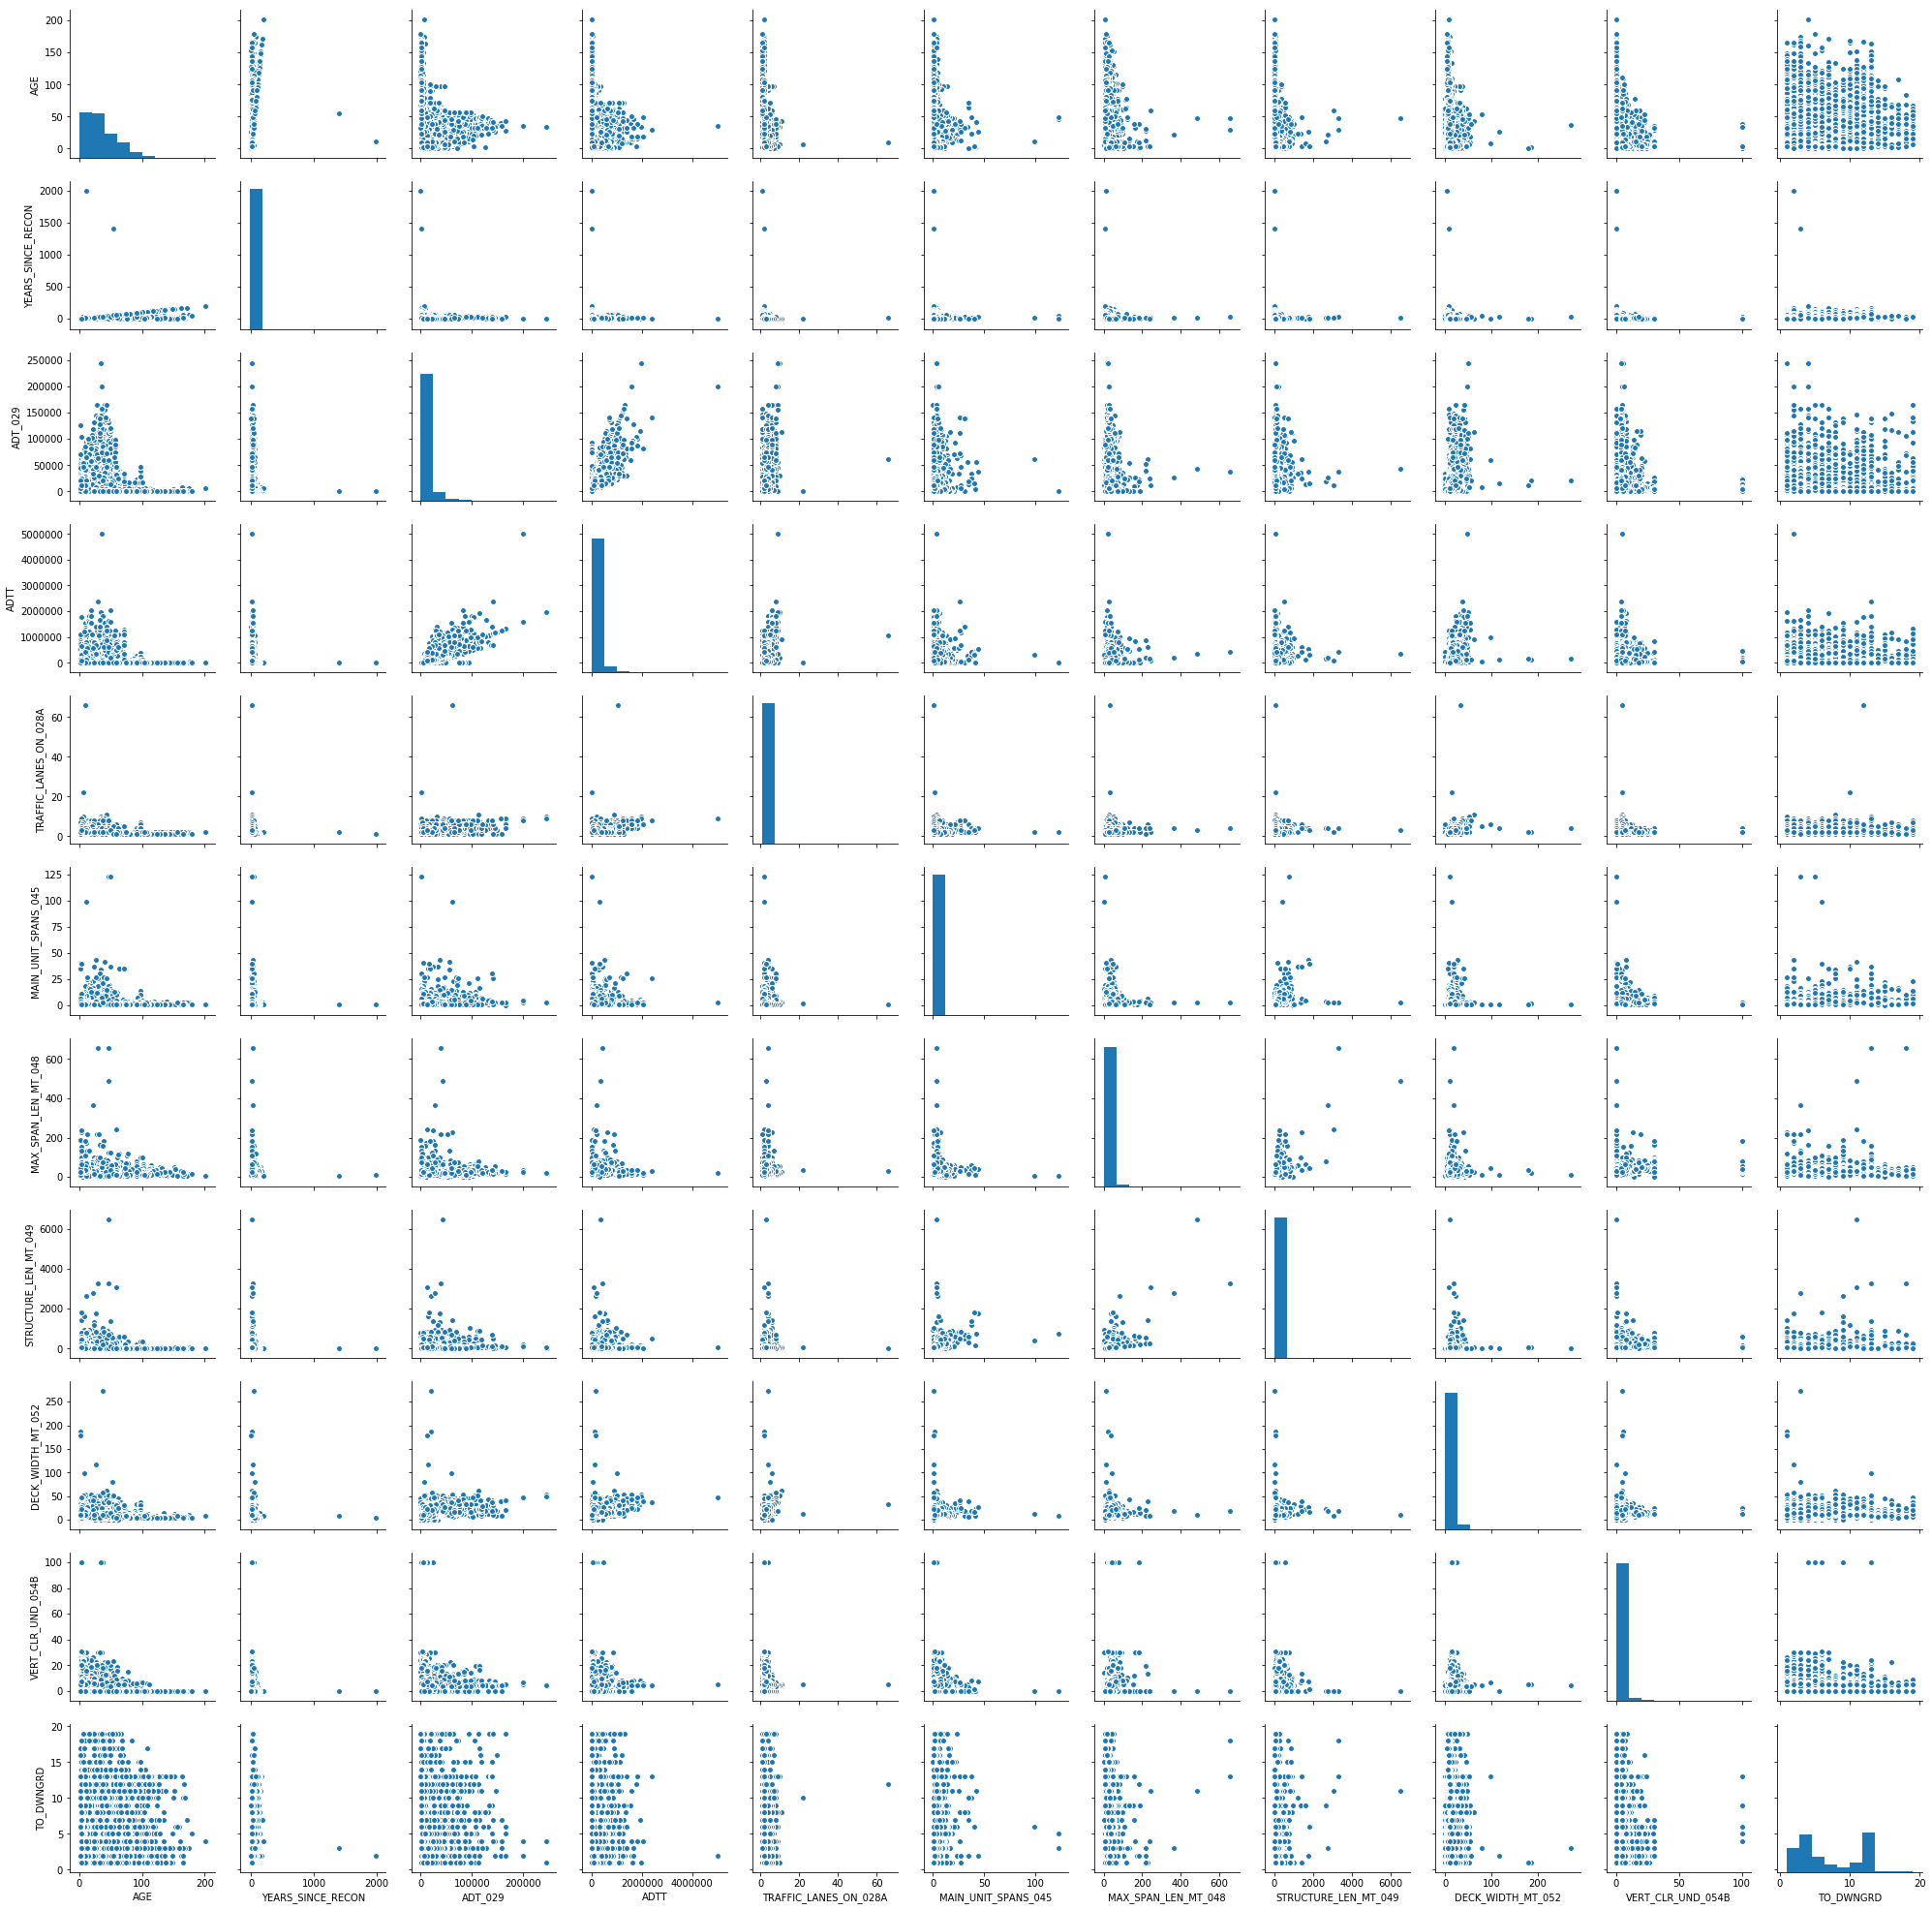

In [11]:
sns.pairplot(pd.concat([X_num, Y], axis=1));

## Impute average values for zeros

In [11]:
for column in X_num.columns:
    X_num[column][X_num[column] == 0] = X_num[column].mean()

In [12]:
X_num.head()

,AGE,YEARS_SINCE_RECON,ADT_029,ADTT,TRAFFIC_LANES_ON_028A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,VERT_CLR_UND_054B
ID,,,,,,,,,,
10-1038 209,4.0,4.0,13090.0,39270.0,2.0,1.0,8.2,9.1,14.2,2.253492
10-1054A017,6.0,6.0,14112.0,141120.0,5.0,1.0,12.2,12.8,33.3,2.253492
10-1172A275,11.0,11.0,1572.0,11004.0,2.0,3.0,6.1,19.8,12.4,4.770000
10-1177 274,98.0,33.0,6580.0,46060.0,2.0,1.0,6.1,7.9,8.1,2.253492
10-1211A011,50.0,40.0,37376.0,112128.0,4.0,1.0,15.8,17.1,27.3,2.253492


In [13]:
X_num[(X_num < 0).any(1)]

,AGE,YEARS_SINCE_RECON,ADT_029,ADTT,TRAFFIC_LANES_ON_028A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,VERT_CLR_UND_054B
ID,,,,,,,,,,
42-170036029008500,1.0,-19.0,1759.0,15831.0,2.0,1.0,28.1,29.1,11.4,2.253492


In [14]:
X_num.loc['42-170036029008500', 'YEARS_SINCE_RECON'] = 1

## Log Transformation

In [15]:
X_num = np.log(X_num)

In [16]:
X_num.head()

,AGE,YEARS_SINCE_RECON,ADT_029,ADTT,TRAFFIC_LANES_ON_028A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,VERT_CLR_UND_054B
ID,,,,,,,,,,
10-1038 209,1.386294,1.386294,9.479604,10.578216,0.693147,0.000000,2.104134,2.208274,2.653242,0.812481
10-1054A017,1.791759,1.791759,9.554781,11.857366,1.609438,0.000000,2.501436,2.549445,3.505557,0.812481
10-1172A275,2.397895,2.397895,7.360104,9.306014,0.693147,1.098612,1.808289,2.985682,2.517696,1.562346
10-1177 274,4.584967,3.496508,8.791790,10.737700,0.693147,0.000000,1.808289,2.066863,2.091864,0.812481
10-1211A011,3.912023,3.688879,10.528784,11.627396,1.386294,0.000000,2.760010,2.839078,3.306887,0.812481


## Define feature and target variables

In [17]:
X = X_num.join(X_cat)

In [18]:
X = X.loc[X.index.isin(X.index[X.index.str.startswith("24", na=False)])]

In [19]:
y = Y.loc[Y.index.isin(Y.index[Y.index.str.startswith("24", na=False)])]

In [20]:
X.index.equals(y.index)

True

## EDA

## Test/train split

In [21]:
from sklearn import model_selection

In [22]:
# shuffle and split data into test/train
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

## Scale numerical data

In [23]:
from sklearn import preprocessing

In [24]:
# intialize scaler and fit on training features
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [25]:
# scale training dataset
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_train_scaled.head()

,AGE,YEARS_SINCE_RECON,ADT_029,ADTT,TRAFFIC_LANES_ON_028A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,VERT_CLR_UND_054B,...,DECK_PROTECTION_108C_0,DECK_PROTECTION_108C_1,DECK_PROTECTION_108C_2,DECK_PROTECTION_108C_3,DECK_PROTECTION_108C_4,DECK_PROTECTION_108C_6,DECK_PROTECTION_108C_7,DECK_PROTECTION_108C_8,DECK_PROTECTION_108C_9,DECK_PROTECTION_108C_N
ID,,,,,,,,,,,,,,,,,,,,,
24-200000WO0504010,0.645178,0.374258,0.315187,0.191347,0.00000,0.228298,0.259158,0.092219,0.135766,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24-100000100159010,0.630829,0.680544,0.819201,0.740525,0.30103,0.000000,0.500374,0.185998,0.378578,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24-100000140029010,0.268413,0.289566,0.589217,0.450847,0.30103,0.432120,0.338918,0.330384,0.315590,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24-100000020162010,0.376765,0.406457,0.803738,0.724854,0.30103,0.144040,0.665546,0.431825,0.393382,0.373763,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24-200000W-2127010,0.843541,0.910019,0.459546,0.337651,0.30103,0.000000,0.311619,0.025768,0.219525,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
X_test[X_test.isnull().any(axis=1)]

,AGE,YEARS_SINCE_RECON,ADT_029,ADTT,TRAFFIC_LANES_ON_028A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,VERT_CLR_UND_054B,...,DECK_PROTECTION_108C_0,DECK_PROTECTION_108C_1,DECK_PROTECTION_108C_2,DECK_PROTECTION_108C_3,DECK_PROTECTION_108C_4,DECK_PROTECTION_108C_6,DECK_PROTECTION_108C_7,DECK_PROTECTION_108C_8,DECK_PROTECTION_108C_9,DECK_PROTECTION_108C_N
ID,,,,,,,,,,,,,,,,,,,,,


In [28]:
# X_test.dropna(inplace=True)

In [27]:
# scale test dataset
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
X_test_scaled.head()

,AGE,YEARS_SINCE_RECON,ADT_029,ADTT,TRAFFIC_LANES_ON_028A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,VERT_CLR_UND_054B,...,DECK_PROTECTION_108C_0,DECK_PROTECTION_108C_1,DECK_PROTECTION_108C_2,DECK_PROTECTION_108C_3,DECK_PROTECTION_108C_4,DECK_PROTECTION_108C_6,DECK_PROTECTION_108C_7,DECK_PROTECTION_108C_8,DECK_PROTECTION_108C_9,DECK_PROTECTION_108C_N
ID,,,,,,,,,,,,,,,,,,,,,
24-100000100154010,0.630829,0.680544,0.779933,0.700728,0.301030,0.000000,0.554901,0.308579,0.378578,0.343401,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24-100000160062010,0.816976,0.881361,0.692420,0.612037,0.301030,0.000000,0.311619,0.116094,0.245038,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24-200000BC3128010,0.693837,0.500867,0.818199,0.749127,0.000000,0.228298,0.500374,0.319895,0.251924,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24-100000150101010,0.688382,0.406457,0.983426,0.906961,0.903090,0.288080,0.553283,0.414983,0.747298,0.466552,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24-100000030189010,0.699142,0.535761,0.941092,0.864057,0.477121,0.228298,0.540883,0.328012,0.464093,0.339011,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
y_train.head()

,TO_DWNGRD
ID,
24-200000WO0504010,3
24-100000100159010,13
24-100000140029010,12
24-100000020162010,9
24-200000W-2127010,6


In [29]:
y_test.head()

,TO_DWNGRD
ID,
24-100000100154010,13
24-100000160062010,9
24-200000BC3128010,15
24-100000150101010,4
24-100000030189010,16


# Model

## Initial Linear Regression Modeling

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
model.score(X_train_scaled, y_train)

0.17441042160476106

In [33]:
model.score(X_test_scaled, y_test)

0.04349888779633937

In [34]:
predicts = model.predict(X_test_scaled)

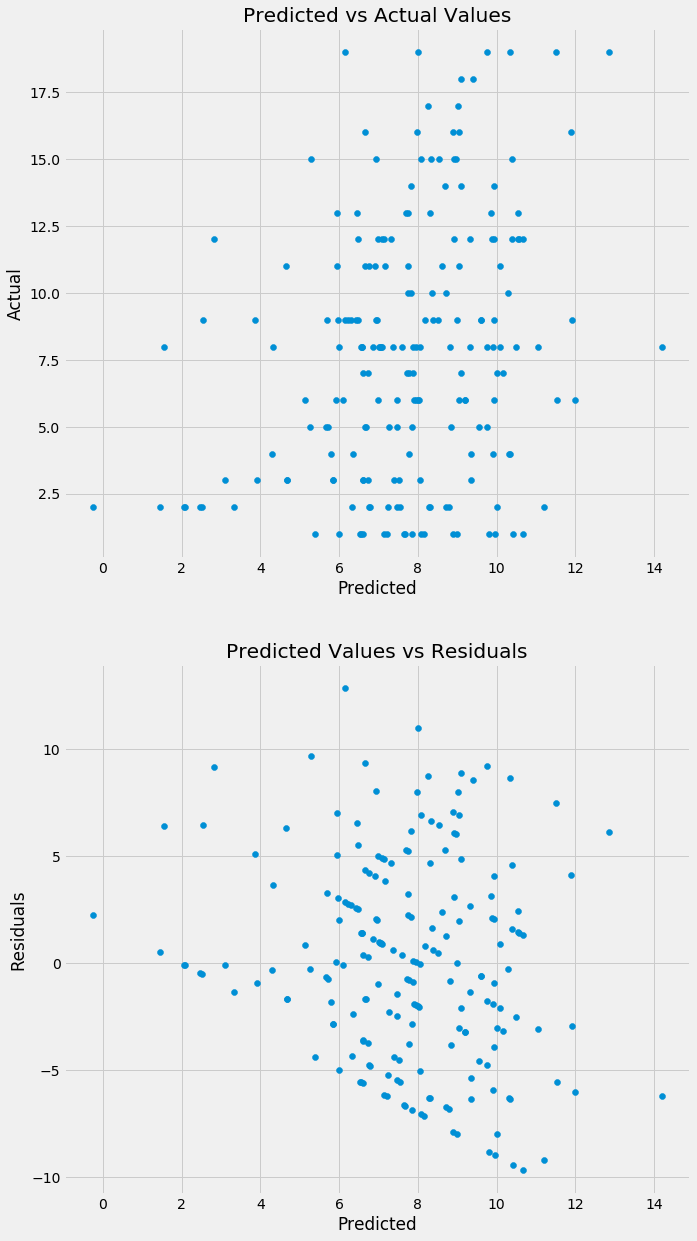

In [35]:
res_plot(y_test.values, predicts)

## Polynomial Transformation

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
poly_mod = PolynomialFeatures(degree=2)
poly_mod.fit(X_train_scaled)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [38]:
X_train_poly = poly_mod.transform(X_train_scaled)

In [39]:
X_train_poly = poly_mod.transform(X_train_scaled)
X_test_poly = poly_mod.transform(X_test_scaled)

In [40]:
model = LinearRegression()

In [41]:
scores = model_selection.cross_val_score(model, X_train_poly, y_train, cv=2)
scores

array([-7.05650977e+14, -5.86126919e+14])

In [42]:
model.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
model.score(X_train_poly, y_train)

0.9826742990179522

In [44]:
model.score(X_test_poly, y_test)

-1.0694766673774976e+16

In [45]:
predicts = model.predict(X_train_poly)

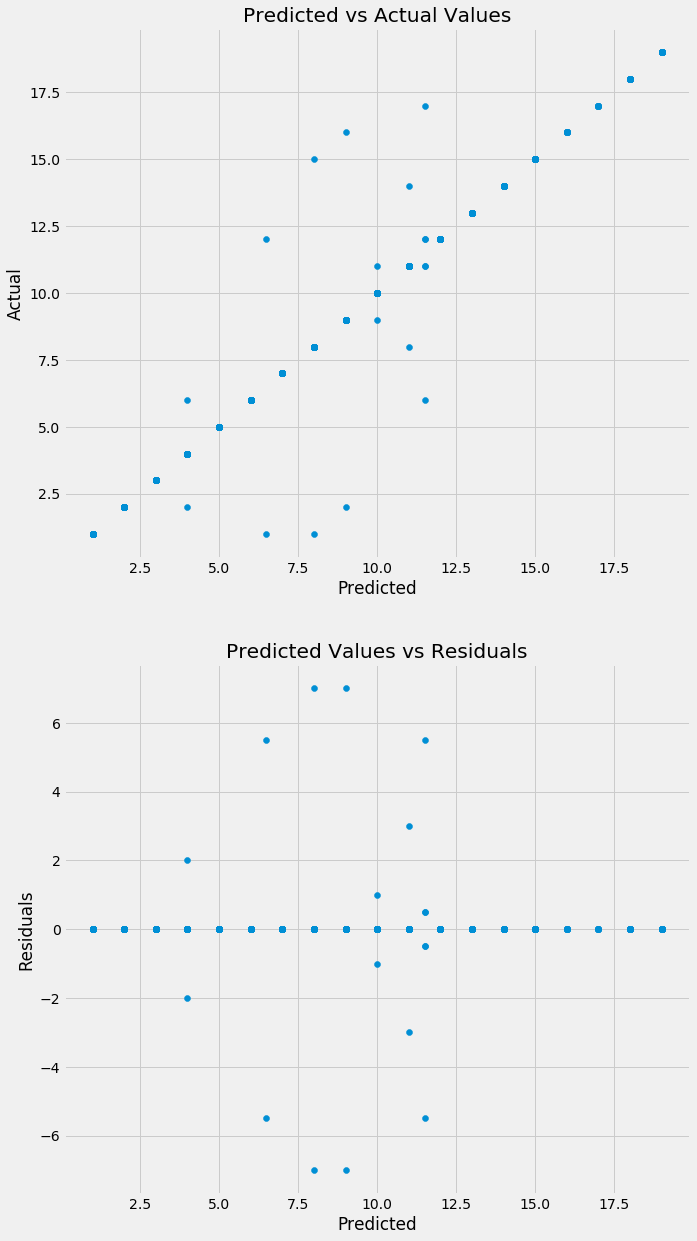

In [46]:
res_plot(y_train.values, predicts)

## Regularization

In [47]:
n_steps = 50
alphas = np.linspace(50, 400, n_steps)

In [48]:
re_mod = RegularizeLRModel(X_train_poly, y_train, alphas)

In [49]:
re_mod.val_score()

In [50]:
b_alpha = re_mod.best_alpha
b_alpha

400.0

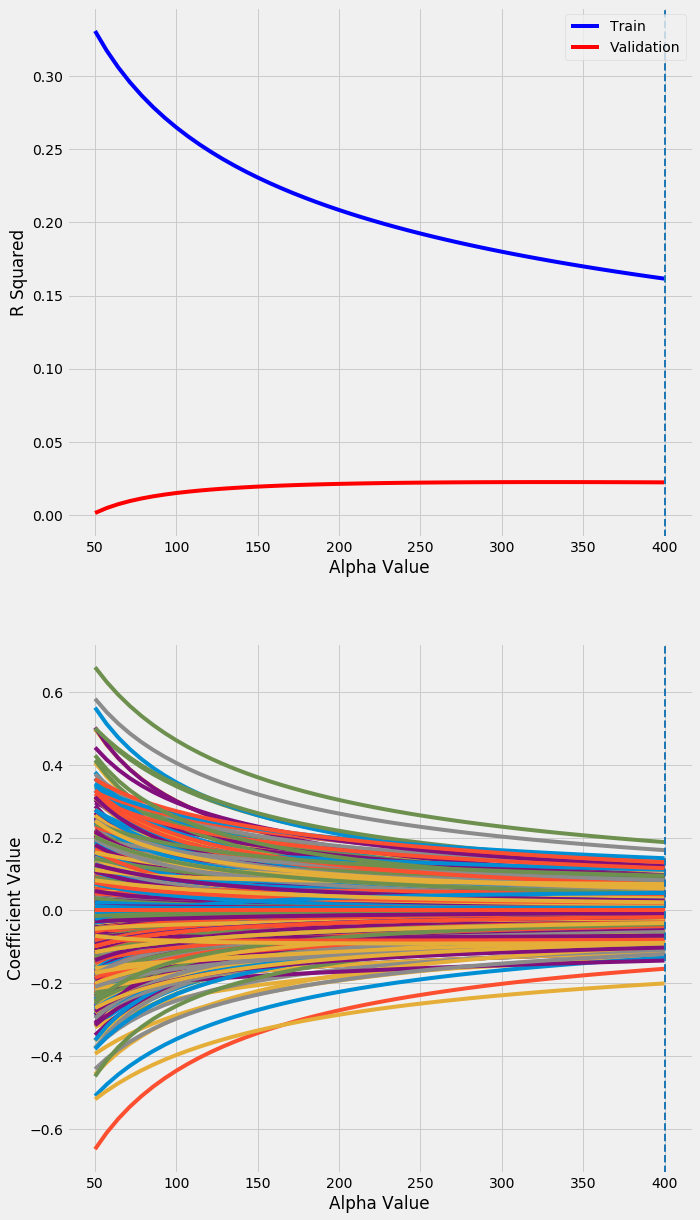

In [51]:
re_mod.val_curve()

## Final Model

In [52]:
reg_model = linear_model.Ridge(alpha=b_alpha)
reg_model.fit(X_train_poly, y_train)

Ridge(alpha=400.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [53]:
reg_model.score(X_test_poly, y_test)

0.07396052667037245

In [77]:
reg_model.coef_[0]

array([ 0.        , -0.04515201,  0.02345861, ...,  0.00705817,
        0.        ,  0.02927496])